# Lab 1: Stream cipher based on LFSR

This lab is based on the **pylfsr** package. Information about this package is available here:https://lfsr.readthedocs.io/en/latest/index.html

To install the package use the following commands:
```
. /ubs/soft/anaconda3/varenv
pip install pylfsr
```

## Explore the package if some of the Lab1 commands are unclear.

### Please note that the interpretation of the polynomial is different from that seen in class.

### The highest order of the polynomial corresponds to the keystream bit and the lowest order (i.e., X^0 = 1) to the feedback bit.

In [2]:
%pip install pylfsr

# Part 1: LFSR study

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pylfsr import LFSR

## 1.1. First exemple p(x) = x^3 + x^2 + 1

This first example shows a 3-bit LFSR with feedback polynomial `x^3 + x^2 + 1` using `pylfsr` package

<ipython-input-5-f4f2604b36aa>:4: DeprecationWarning: function runFullCycle will be deprecated in future version, due to misnomer, use "runFullPeriod" instead.
  L.runFullCycle()


S:  [1 1 1]
S:  [0 1 1]
S:  [0 0 1]
S:  [1 0 0]
S:  [0 1 0]
S:  [1 0 1]
S:  [1 1 0]


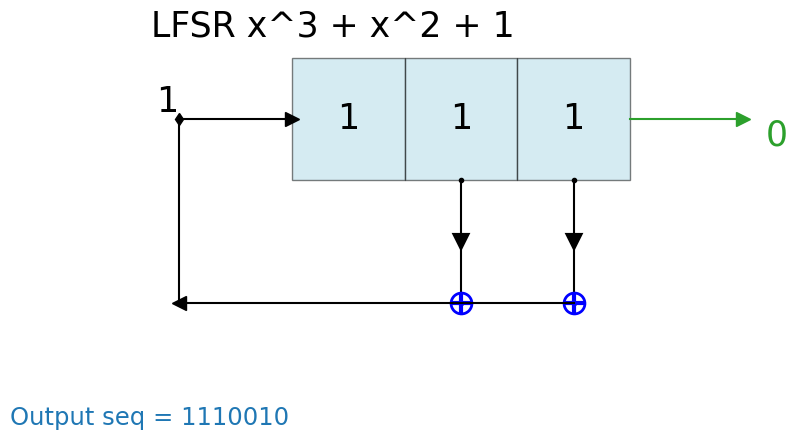

In [ ]:
state = [1,1,1] # 3 registers are used for this LFSR. Initialisation state is 1, 1, 1
fpoly = [3,2] # definition of the LFSR feedback polynomial
L = LFSR(fpoly=fpoly,initstate =state, verbose=True)
L.runFullCycle()
L.Viz(title='LFSR x^3 + x^2 + 1')

### Question 1: Explain how the LFSR is built using the `pylfsr` package.

The LFRS is composed of three registers and XOR gates. We have the state array containing the initial state of the register and the fpoly array specifies which grade of the polynomial goes to the feedback.

### Question 2: Manually write down all the states of the LFSR (and the associated output, i.e., the keystream bit) and compare them with the sequence given in the cell below. Do they match?

In [ ]:
L.runFullCycle()

S:  [1 1 1]
S:  [0 1 1]
S:  [0 0 1]
S:  [1 0 0]
S:  [0 1 0]
S:  [1 0 1]
S:  [1 1 0]


<ipython-input-5-cbb8744109e1>:1: DeprecationWarning: function runFullCycle will be deprecated in future version, due to misnomer, use "runFullPeriod" instead.
  L.runFullCycle()


array([1, 1, 1, 0, 0, 1, 0])

Yes, they match!

## 1.2. Second exemple p(x) = x^5 + x^2 + 1

This second example shows a 5-bit LFSR with feedback polynomial  `x^5 + x^2 + 1` **(default polynomial in `pylfsr` package)**

**Execute the cell and analyze the structure of the LFSR and its inital state.**

<ipython-input-6-1dd110ae475e>:4: DeprecationWarning: function runFullCycle will be deprecated in future version, due to misnomer, use "runFullPeriod" instead.
  L.runFullCycle()


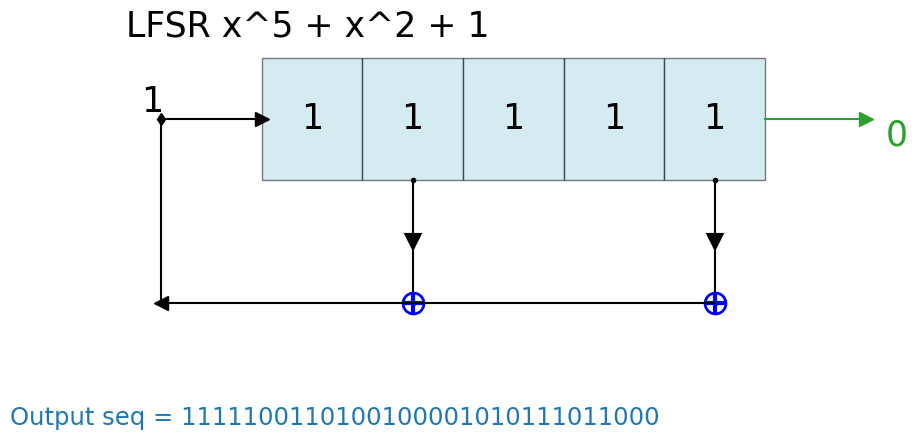

In [ ]:
state = [1,1,1, 1, 1] # 3 registers are used for this LFSR. Initialisation state is 1, 1, 1, 1, 1
fpoly = [5,2] # definition of the LFSR feedback polynomial
L = LFSR(fpoly=fpoly,initstate =state)
L.runFullCycle()
L.Viz(show=False, show_labels=False,title='LFSR x^5 + x^2 + 1')


### Question 3: Run one cycle using the `.next` command and analyze the new output. Is it the expected evolution?

In [ ]:
L.next()

0

The next() function provide the next item of the keystream. Comparing hand-calculated results with the function output we can say their results match. We need to run this cell as many times as the length of the sequence in order to fully see it.

### Question 4: Manually write down the ten first states of the LFSR starting from the initial state (and the associated output, i.e., the keystream bit) and compare with the sequence given in the cell below. Do they match?

In [ ]:
L.runFullCycle()
L.info()

5-bit LFSR with feedback polynomial  x^5 + x^2 + 1 with
Expected Period (if polynomial is primitive) =  31
Computing configuration is set to Fibonacci with output sequence taken from 5-th (-1) register
Current :
 State        :  [0 1 0 0 0]
 Count        :  46
 Output bit   :  0
 feedback bit :  0
 Output Sequence: 1111100110100100001010111011000111110011010010


<ipython-input-21-9ffb5ebcfcc9>:1: DeprecationWarning: function runFullCycle will be deprecated in future version, due to misnomer, use "runFullPeriod" instead.
  L.runFullCycle()


The 'Output Sequence' field provide the keystream. It matches with the one we computed manually.

## 1.3. Third exemple p(x) = x^3 + x + 1

This third example shows a 3-bit LFSR with a **primitive feedback polynomial**

In [ ]:
L.get_fpolyList(3) #this command provides a non-exhaustive list of primitive polynomials

[[3, 1]]

S:  [1 1 1]
S:  [0 1 1]
S:  [1 0 1]
S:  [0 1 0]
S:  [0 0 1]
S:  [1 0 0]
S:  [1 1 0]


<ipython-input-10-fdc7adab2fbf>:4: DeprecationWarning: function runFullCycle will be deprecated in future version, due to misnomer, use "runFullPeriod" instead.
  L.runFullCycle()


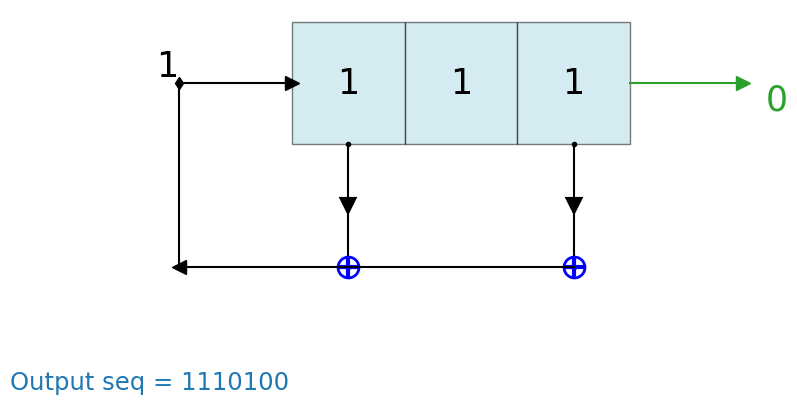

In [ ]:
state = [1,1,1] # 3 registers and initialisation state is 1, 1, 1
fpoly = [3,1] # descrption of the polynomial
L = LFSR(fpoly=fpoly,initstate =state, verbose=True)
L.runFullCycle()
L.Viz(show=False, show_labels=False)

### Question 5: Explain what a primitive polynomial is.

### Question 6: Verify that this polynomial is primitive. In the simulation below how many iterations of the primitive sequence are running?

A primitive polynomial is an irreducible polynomial that, when used in a LFSR, generates a maximal length sequence.

The given polynomial generates 7 distinct iterations which is maximal because having degree 3, 2^3 -1 = 7.

In [15]:
state = [1,1,1]
fpoly = [3,1]
L = LFSR(initstate=state,fpoly=fpoly)
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(21):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
0	[1 1 1]		-1	[-1]
1	[0 1 1]		1	[1]
2	[1 0 1]		1	[1 1]
3	[0 1 0]		1	[1 1 1]
4	[0 0 1]		0	[1 1 1 0]
5	[1 0 0]		1	[1 1 1 0 1]
6	[1 1 0]		0	[1 1 1 0 1 0]
7	[1 1 1]		0	[1 1 1 0 1 0 0]
8	[0 1 1]		1	[1 1 1 0 1 0 0 1]
9	[1 0 1]		1	[1 1 1 0 1 0 0 1 1]
10	[0 1 0]		1	[1 1 1 0 1 0 0 1 1 1]
11	[0 0 1]		0	[1 1 1 0 1 0 0 1 1 1 0]
12	[1 0 0]		1	[1 1 1 0 1 0 0 1 1 1 0 1]
13	[1 1 0]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0]
14	[1 1 1]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0 0]
15	[0 1 1]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1]
16	[1 0 1]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1]
17	[0 1 0]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1]
18	[0 0 1]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0]
19	[1 0 0]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1]
20	[1 1 0]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0]
--------------------------------------------------
Output:  [1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0]


**The cell below allows a simulation of the LFSR**

In [ ]:
%matplotlib notebook
L = LFSR(initstate=state,fpoly=fpoly)
fig, ax = plt.subplots(figsize=(10,5))
for _ in range(22):
  ax.clear()
  L.Viz(ax=ax, title='LFSR x^3 + x^1 + 1')
  plt.ylim([-0.1,None])
  #plt.tight_layout()
  L.next()
  fig.canvas.draw()
  plt.pause(0.1)

<IPython.core.display.Javascript object>

Simulation can be done on larger LFSR. Below is an example with feedback polynomial: ```x^32 + x^28 + x^19 + x^18 + x^16 + x^14 + x^11 + x^10 + x^9 + x^6 + x^5 + 1```

In [ ]:
%matplotlib notebook
L = LFSR(initstate=[1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1, 1,1],fpoly=[32,28,19,18,16,14,11,10,9,6,5,1],counter_start_zero=False)

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(35):
  ax.clear()
  L.Viz(ax=ax, title='R1')
  plt.ylim([-0.1,None])
  #plt.tight_layout()
  L.next()
  fig.canvas.draw()
  plt.pause(0.1)

<IPython.core.display.Javascript object>

# Part 2: LFSR Properties

## 2.1. Feedback Primitive Polynomials

**A primitive polynomial is irreducible, and not trivial to derive**.
A list of primitive polynomials upto 32 degree can be found here: http://www.partow.net/programming/polynomials/index.html (it is not an exhaustive list).

A list of feedback polynomials for a m-bit LFSR can be obtained using ```.get_fpolyList(m)```

In [ ]:
# This is an example of generating a primitive polynomial
L = LFSR()
# list of 5-bit feedback polynomials
L.get_fpolyList(5)

[[5, 2], [5, 4, 2, 1], [5, 4, 3, 2]]

**Try different sizes of primitive polynomials to have an idea of possible polynomials**

### Question 7: For m=4, construct a primitive polynomial and a non-primitive polynomial (to construct a non-primitive polynomial just set a polynomial and check if it is primitive or not). Are the numbers of different states identical when building a primitive polynomial and a non-primitive polynomial? What impact it has regarding security when using a non-primitive polynomial?

In [ ]:
# This is an example of generating a primitive polynomial
L = LFSR(initstate=[1,1,1,1],fpoly=[4,1],counter_start_zero=False)

# list of 5-bit feedback polynomials
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(40):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
1	[1 1 1 1]		1	[1]
2	[0 1 1 1]		1	[1 1]
3	[1 0 1 1]		1	[1 1 1]
4	[0 1 0 1]		1	[1 1 1 1]
5	[1 0 1 0]		0	[1 1 1 1 0]
6	[1 1 0 1]		1	[1 1 1 1 0 1]
7	[0 1 1 0]		0	[1 1 1 1 0 1 0]
8	[0 0 1 1]		1	[1 1 1 1 0 1 0 1]
9	[1 0 0 1]		1	[1 1 1 1 0 1 0 1 1]
10	[0 1 0 0]		0	[1 1 1 1 0 1 0 1 1 0]
11	[0 0 1 0]		0	[1 1 1 1 0 1 0 1 1 0 0]
12	[0 0 0 1]		1	[1 1 1 1 0 1 0 1 1 0 0 1]
13	[1 0 0 0]		0	[1 1 1 1 0 1 0 1 1 0 0 1 0]
14	[1 1 0 0]		0	[1 1 1 1 0 1 0 1 1 0 0 1 0 0]
15	[1 1 1 0]		0	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0]
16	[1 1 1 1]		1	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1]
17	[0 1 1 1]		1	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1]
18	[1 0 1 1]		1	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1]
19	[0 1 0 1]		1	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1]
20	[1 0 1 0]		0	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0]
21	[1 1 0 1]		1	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1]
22	[0 1 1 0]		0	[1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0]
23	[0 0 1 1]		1	[1 1 1 1 0 

This sequence generated with a primitive polynomial (1 1 1 1 0 1 0 1 1 0 0 1 0 0 0) has length 15

In [ ]:
# This is an example of generating a primitive polynomial
L = LFSR(initstate=[1,1,1,1],fpoly=[4,3, 2, 1],counter_start_zero=False)

# list of 5-bit feedback polynomials
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(40):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
1	[1 1 1 1]		1	[1]
2	[0 1 1 1]		1	[1 1]
3	[1 0 1 1]		1	[1 1 1]
4	[1 1 0 1]		1	[1 1 1 1]
5	[1 1 1 0]		0	[1 1 1 1 0]
6	[1 1 1 1]		1	[1 1 1 1 0 1]
7	[0 1 1 1]		1	[1 1 1 1 0 1 1]
8	[1 0 1 1]		1	[1 1 1 1 0 1 1 1]
9	[1 1 0 1]		1	[1 1 1 1 0 1 1 1 1]
10	[1 1 1 0]		0	[1 1 1 1 0 1 1 1 1 0]
11	[1 1 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1]
12	[0 1 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1]
13	[1 0 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1]
14	[1 1 0 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1]
15	[1 1 1 0]		0	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
16	[1 1 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
17	[0 1 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
18	[1 0 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
19	[1 1 0 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
20	[1 1 1 0]		0	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
21	[1 1 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
22	[0 1 1 1]		1	[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
23	[1 0 1 1]		1	[1 1 1 1 0 

This sequence generated with a non primitive polynomial (1 1 1 1 0) has length 5. We can clearly see the difference between the primitive and non primitive polynomials.

## 2.2. Properties comparison between primitive polynomial and non primitive polynomial

1. Periodicity
------------------
 - Expected period = 2^M-1 = 31
 - Pass?:  True

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period)
 - #1s =  16 	#0s =  15 := 16 = 1 + 15
 - Pass?:  True

3. Runlength Property
-------------------
 - Number of Runs of different lengths in a period should be of specific order, e.g. [4,2,1,1], that is 4 runs of length 1, 2 runs of length 2 and so on ..
 - Runs:  [8 4 2 1 1]
 - Pass?:  True

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else 

 - Rxx(k):  [ 1.    -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032  1.    -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 

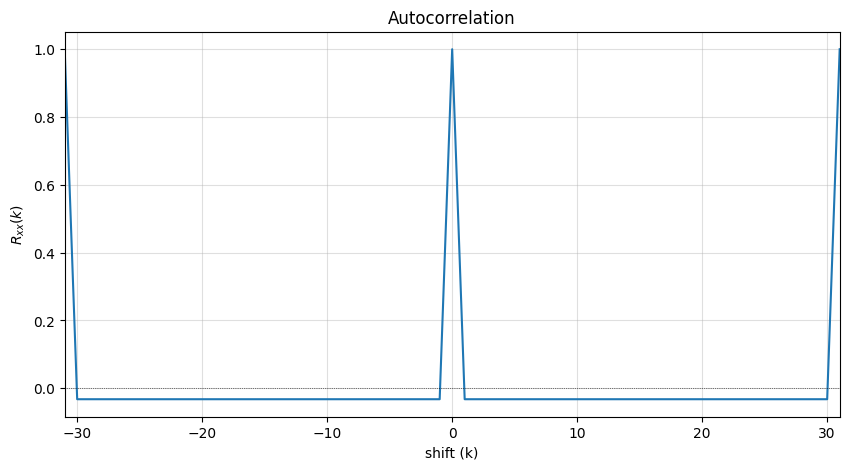

 - Pass?:  True



Passed all the tests


In [ ]:
# This is an example of a primitive polynomial

state = [1,1,1,1,0]
fpoly = [5,2]
L = LFSR(initstate=state,fpoly=fpoly)
fig, ax = plt.subplots(figsize=(10,5))
result  = L.test_properties(verbose=2)

1. Periodicity
------------------
 - Expected period = 2^M-1 = 31
 - Pass?:  False

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period)
 - #1s =  17 	#0s =  14 := 17 = 1 + 14
 - Pass?:  False

3. Runlength Property
-------------------
 - Number of Runs of different lengths in a period should be of specific order, e.g. [4,2,1,1], that is 4 runs of length 1, 2 runs of length 2 and so on ..
 - Runs:  [11  0  0  5]
 - Pass?:  False

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else 

 - Rxx(k):  [ 1.    -0.032  0.355 -0.032 -0.29   0.097 -0.806  0.226 -0.29   0.097
  0.226 -0.161  0.613 -0.419  0.226 -0.161 -0.161  0.226 -0.419  0.613
 -0.161  0.226  0.097 -0.29   0.226 -0.806  0.097 -0.29  -0.032  0.355
 -0.032  1.    -0.032  0.355 -0.032 -0.29   0.097 -0.806  0.226 -0.29
  0.097  0.226 -0.161  0.613 -0.419  0.226 -0.161 -0.161  0.226 -0.419
  0.613 -0.161  0.

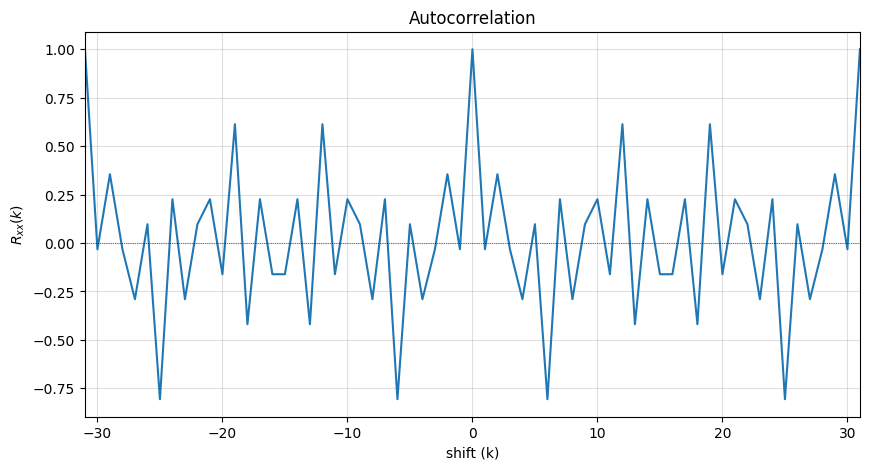

 - Pass?:  False



Failed one or more tests, check if feedback polynomial is primitive polynomial


In [5]:
# This is an example of a primitive polynomial

state = [1,1,1,1,0]
fpoly = [5,3,2]
L = LFSR(initstate=state,fpoly=fpoly)
fig, ax = plt.subplots(figsize=(10,5))
result  = L.test_properties(verbose=2)

### Question 8: Explain all the properties provided by the test_properties function

The periodicity test just checks whether the period of the sequence is maximal, I.E. equal to 2^n - 1 where n is the degree of the polynomial.

The balance test checks that there is a similar number of 0s and 1s in the sequence.

The runlenght array counts the amount of runs (I.E. consecutive sequences of identical bits) for each lenght respectively, for example [8 4 2 1 1] means that there are 8 runs of length 1, 4 runs of lenght 2 and so on.

Finally, the autocorrelation compares portions of the sequence with shifted versions of it. It is meant to evaulate how similar the sequence is to itself.

### Question 9: Explain all the properties provided by the test_properties function and compare with primitive polynomial

Periodicity:

Checks if the sequence has a maximal period of 2^n−1.
Primitive polynomials achieve this, while non-primitive ones result in shorter periods.

Balance Property:

Evaluates the distribution of 1s and 0s. Primitive polynomials maintain a near-equal count, whereas non-primitive polynomials often show significant imbalance.

Run Length Property:

Assesses the distribution of consecutive bits. Primitive polynomials have a diverse run length, while non-primitive polynomials may have excessive runs of length 1, making the sequence predictable.

Autocorrelation Property:

Checks if autocorrelation is noise-like (1 at lag 0, close to zero elsewhere). Primitive polynomials display this property, while non-primitive ones may reveal predictable patterns.

Comparison with Primitive Polynomials

Non-primitive polynomials are less suitable for LFSR use because they produce shorter and less balanced sequences. They often have an imbalance in the number of 1s and 0s, too many runs of length 1, and a predictable autocorrelation pattern, which significantly reduces their security compared to primitive polynomials.

# Part 3: Designing a toy stream cipher using LFSR

### Question 10: Build your own stream cipher combining two LFSR with primitive polynomials. The output of the two LFSRs are combined with a Xor operation. Explain you code.
* On the sender side (ALICE Side) encrypt a message using the generated keystream
* Then, on the receiver side (BOB Side) decrypt the message and check if the original message is retrieved

In [6]:
# LSFT initialization
degree = 16
fpoly = L.get_fpolyList(degree)[0]
period_length = pow(2,degree) - 1
warm_up = degree * 4 + 1
state = [1] * degree
poly = LFSR(initstate=state,fpoly=fpoly)

We chose a primitive polynomial of order 16 for our LFSRm in order to have a really long period. We then convert the string to binary and XOR it with the keystream.

In [7]:
def string_to_binary(text):
    binary_representation = ''.join(format(ord(char), '08b') for char in text)
    return binary_representation
def binary_to_string(binary_string):
    binary_values = [binary_string[i:i+8] for i in range(0, len(binary_string), 8)]
    ascii_string = ''.join(chr(int(binary, 2)) for binary in binary_values)
    return ascii_string
def xor(a, b):
  if a == b:
    return 0
  else:
     return 1
def xor_string_poly(s, p):
  res = ""
  key = ""
  for bit in s:
    k = p.next()
    res += str(xor(int(bit), k))
    key += str(k)
  #print(s)
  #print()
  #print(key)
  return res
degree = 16
fpoly = L.get_fpolyList(degree)[0]
# ALICE
poly.set_state([1]*degree)
poly.runKCycle(warm_up)
message = "CIAO COME STAI"
binary_message = string_to_binary(message)
print(binary_message)
encrypted_message = xor_string_poly(binary_message, poly)
print("ALICE: ", message)


#BOB
poly.set_state([1]*degree)
poly.runKCycle(warm_up)
decrypted_message = xor_string_poly(encrypted_message, poly)
text_message = binary_to_string(decrypted_message)
print("BOB: ", encrypted_message)
print("Decrypted: ", text_message)

0100001101001001010000010100111100100000010000110100111101001101010001010010000001010011010101000100000101001001
ALICE:  CIAO COME STAI
BOB:  1001101101110110110101100001011100011001010111010001100010100110011010100101010001001111001011011100010011101101
Decrypted:  CIAO COME STAI


### Question 11: Using the previous stream cipher, on the sender side, write a program that reads a file and encrypts the content of the file to provide a ciphertext that is stored in a new file. On the receiver side, read the ciphertext from the new file and decrypt the content of the file to retrieve the plaintext.


In [8]:
# @title Test file creation
filename = "test.txt"
with open(filename, "w") as file:
    file.write("This is a text file. You can do what you want with it.")

In [9]:
def read_file(filename):
    "Read the text in 'filename' and convert it into a very simple, but possibly large, string."
    res = []
    with open(filename, 'r', encoding='ascii') as f:
        for l in f:
            line = l
            if line: # do not append empty lines
                res.append(line)
    return ' '.join(res)

In [13]:
# ALICE
def alice(read_file_name, write_file_name):
  poly.set_state([1]*degree)
  poly.runKCycle(warm_up)
  message = read_file(read_file_name)
  binary_message = string_to_binary(message)
  encrypted_message = xor_string_poly(binary_message, poly)
  fo = open(write_file_name, 'w')
  fo.write(encrypted_message)
  fo.close()
alice("test.txt", "test_encrypted.txt")

In [14]:
def bob(read_file_name):
  poly.set_state([1]*degree)
  poly.runKCycle(warm_up)
  encrypted_message = read_file(read_file_name)
  decrypted_message = xor_string_poly(encrypted_message, poly)
  text_message = binary_to_string(decrypted_message)
  return text_message
bob("test_encrypted.txt")

'This is a text file. You can do what you want with it.'